In [1]:
import torch.optim as optim
from model import DF
import numpy as np
import seaborn as sns
import time
from torchsummary import summary
import numpy as np
import torch as t
from model import DF
import shutil
import random
from util.data_generator import *

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)

setup_seed(42)
m = 0.25
gamma = 64
dataset = 'tor_100w_2500tr'




In [2]:
train_dataset = np.load('/root/datasets/FSCIL/tor_100w_2500tr.npz',allow_pickle=True)
x = train_dataset['data']
y = train_dataset['labels']


In [32]:
index = np.random.permutation(100)[4:]

registering se_attention.0.network.3


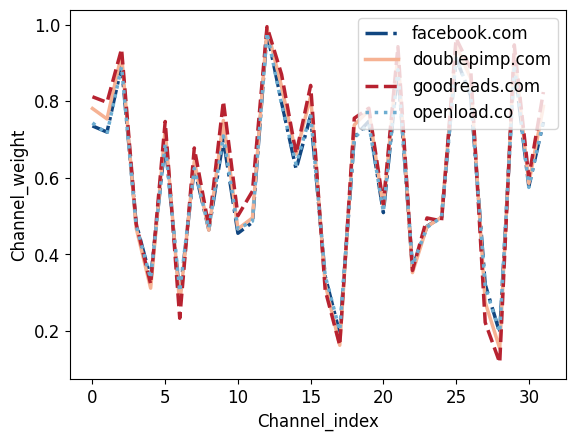

In [5]:
source_domain = 'DF19'
# plt.rcParams.update({'font.size':20})
# train_base(model,m,gamma,source_domain)
num_class = 100
model = DF()
model.cuda()
model.load_state_dict(torch.load(f'./pre_trained_model/finish_model_{m}_{gamma}_{source_domain}.pt'))
model.hook_register()
import matplotlib.pyplot as plt
import copy
index = [31, 62, 37, 26]
model.eval()

attentions = []
names = []
model.reset_attention()
inds = 2500*index[0]
output = model(torch.tensor(x[inds],dtype=t.float32).cuda().reshape(1,1,5000))
names.append(y[inds])
inds = 2500*index[1]
attentions.append(copy.deepcopy(model.activation))
model.reset_attention()
output = model(torch.tensor(x[inds],dtype=t.float32).cuda().reshape(1,1,5000))
names.append(y[inds])
inds = 2500*index[2]
attentions.append(copy.deepcopy(model.activation))
model.reset_attention()
output = model(torch.tensor(x[inds],dtype=t.float32).cuda().reshape(1,1,5000))
names.append(y[inds])
inds = 2500*index[3]
attentions.append(copy.deepcopy(model.activation))
model.reset_attention()
output = model(torch.tensor(x[inds],dtype=t.float32).cuda().reshape(1,1,5000))
names.append(y[inds])

attentions.append(copy.deepcopy(model.activation))
x_data = []
y_data = []
for i in range(1):
    data = attentions[0][i].reshape(-1)
    y_data.append(data)
    data = attentions[1][i].reshape(-1)
    y_data.append(data)
    data = attentions[2][i].reshape(-1)
    y_data.append(data)
    data = attentions[3][i].reshape(-1)
    y_data.append(data)
t_data = {
    'Channel_index': np.arange(0,len(data),1),
    f'{names[0]}': y_data[0],
    f'{names[1]}': y_data[1],
    f'{names[2]}': y_data[2],
    f'{names[3]}':y_data[3],
}
df = pd.DataFrame(t_data)
x_data = np.arange(0,len(data),1)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data[0], marker='', linestyle='-.',label=names[0],color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x_data, y_data[3], marker='', linestyle='-',label=names[3],color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)


plt.plot(x_data, y_data[2], marker='', linestyle='--',label=names[2],color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.plot(x_data, y_data[1], marker='', linestyle=':',label=names[1],color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
plt.ylabel('Channel_weight')
plt.xlabel('Channel_index')
# plt.xlim((0,len(data)+20))
# plt.yticks(fontsize=12)
plt.legend(loc='upper right')
plt.show()

registering se_attention.0.network.3


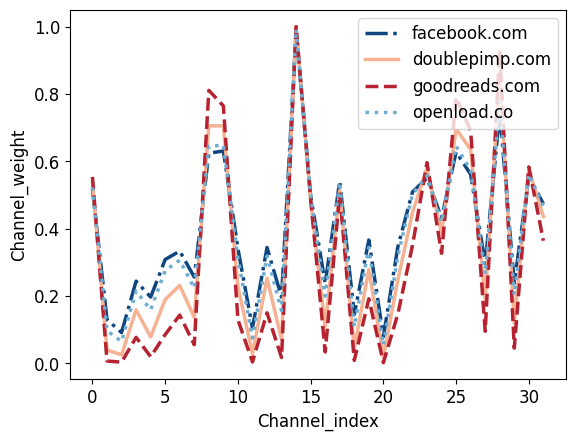

In [6]:
import torch.optim as optim
from model import DF
import numpy as np
import seaborn as sns
import time
from torchsummary import summary
import numpy as np
import torch as t
from model import DF
import shutil
import random
from util.data_generator import *

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)

setup_seed(42)
m = 0.25
gamma = 64
dataset = 'tor_100w_2500tr'
source_domain = 'KNN'
# train_base(model,m,gamma,source_domain)
num_class = 100
model = DF()
model.cuda()
model.load_state_dict(torch.load(f'./pre_trained_model/finish_model_{m}_{gamma}_{source_domain}.pt'))
model.hook_register()
import matplotlib.pyplot as plt
import copy
model.eval()
attentions = []
names = []
for ind in index:
    model.reset_attention()
    inds = 2500*ind
    output = model(torch.tensor(x[inds],dtype=t.float32).cuda().reshape(1,1,5000))
    names.append(y[inds])
    inds = 2500*index[1]
    attentions.append(copy.deepcopy(model.activation))
x_data = []
y_data = []
for i in range(1):
    data = attentions[0][i].reshape(-1)
    y_data.append(data)
    data = attentions[1][i].reshape(-1)
    y_data.append(data)
    data = attentions[2][i].reshape(-1)
    y_data.append(data)
    data = attentions[3][i].reshape(-1)
    y_data.append(data)
t_data = {
    'Channel_index': np.arange(0,len(data),1),
    f'{names[0]}': y_data[0],
    f'{names[1]}': y_data[1],
    f'{names[2]}': y_data[2],
    f'{names[3]}':y_data[3],
}
df = pd.DataFrame(t_data)
# sns.lineplot(data=df.set_index('Channel_index'))
x_data = np.arange(0,len(data),1)
plt.xlabel('Channel_index')
plt.plot(x_data, y_data[0], marker='', linestyle='-.',label=names[0],color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x_data, y_data[3], marker='', linestyle='-',label=names[3],color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)

plt.plot(x_data, y_data[2], marker='', linestyle='--',label=names[2],color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.plot(x_data, y_data[1], marker='', linestyle=':',label=names[1],color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)

plt.ylabel('Channel_weight')
plt.legend(loc='upper right')
plt.show()

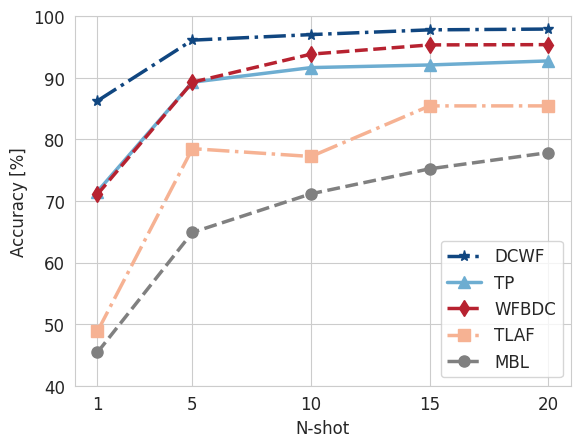

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size':12,'font.family':'Times New Roman'})
plt.rcParams['text.color'] = 'red'
plt.rc('font',family='Times New Roman')
sns.set_style("whitegrid", {"grid.linewidth": 10, "grid.alpha": 0.5})
# 示例数据
t_data = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [86.242859,96.0999,97.0,97.77143,97.9000015],
    'TP': [71.529,89.271,91.643,92.071,92.729],
    'WFBDC': [71.0714285,89.2714285,93.828571,95.328571,95.3714294],
    'TLAF':[48.8142857,78.4857,77.213333,85.4285714,85.4285714],
    'MBL':[45.4142875,64.88571,71.157142,75.2142868,77.84285736],
}
x= [1,5,10,15,20]
plt.plot(x, t_data['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x, t_data['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
plt.plot(x, t_data['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.plot(x, t_data['TLAF'], marker='s', linestyle='-.', label='TLAF',color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)
plt.plot(x, t_data['MBL'], marker='o', linestyle='--', label='MBL',color='gray',linewidth=2.5,markersize=8)

# 添加图例
plt.legend()

# 添加标题和标签
# plt.title('Discrete Data Visualization')
plt.xlabel('N-shot')
plt.ylim((40,100))
plt.xticks([1,5,10,15,20])
plt.ylabel('Accuracy [%]')

# 显示图形
# plt.grid(True)
plt.show()
# df = pd.DataFrame(t_data)
# df = df.set_index('N-shot')

# # 创建一个坐标轴对象
# fig, ax = plt.subplots()

# # 绘制折线图
# sns.lineplot(data = df, ax=ax,linewidth=2)

# # 绘制散点图
# sns.scatterplot(data = df, ax=ax,legend=None,s=50)
# plt.xticks([1,5,10,15,20])
# plt.ylim((40,100))
# plt.ylabel('accuracy')
# # 显示图形
# plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

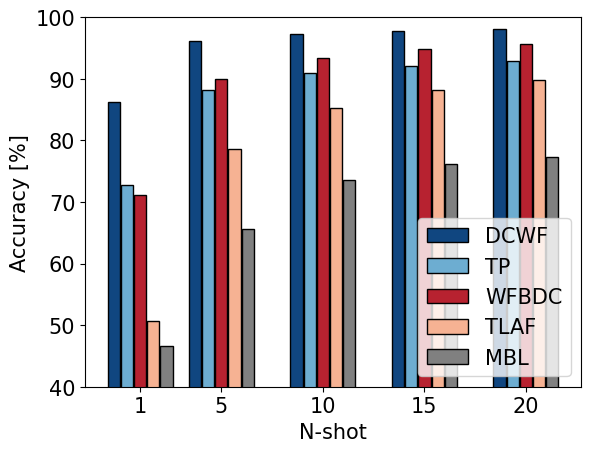

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':15,'font.family':'Times New Roman'})


a = [86.242859, 96.0999, 97.2, 97.77143, 98.057142]
b = [72.7, 88.186, 90.957, 91.986, 92.886]
c = [71.042857, 89.90000,93.285714,94.79999,95.71428]
d = [50.62857, 78.642857,85.2714,88.1857,89.8714]
e = [46.585716,65.671432,73.5,76.114288,77.371429]
# marks = ["o", "X", "+", "*", "O"]

x= np.array([1,5,10,15,20]) # 标签位置
width = 0.6  # 柱状图的宽度

plt.bar(x - width * 2-0.1, a, width, label='DCWF', color=(16/255, 70/255, 128/255),edgecolor="k")
plt.bar(x - width - 0.05, b, width, label='TP', color=(109/255,173/255, 209/255), edgecolor="k")
plt.bar(x + 0, c, width, label="WFBDC", color=(183/255,34/255, 48/255), edgecolor="k")
plt.bar(x + width + 0.05, d, width, label='TLAF', color=(246/255,178/255, 147/255), edgecolor="k")
plt.bar(x + width * 2 + 0.1, e, width, label='MBL', color='gray', edgecolor="k")
plt.xlabel('N-shot')
plt.ylim((40,100))
plt.xticks([1,5,10,15,20])
plt.ylabel('Accuracy [%]')

# plt.plot(x, a, marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
# plt.plot(x, b, marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
# plt.plot(x, c, marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
# plt.plot(x, d, marker='s', linestyle='-.', label='TLAF',color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)
# plt.plot(x, e, marker='o', linestyle='--', label='MBL',color='gray',linewidth=2.5,markersize=8)

# 添加图例
plt.legend(loc='lower right')

# 添加标题和标签
# # plt.title('Discrete Data Visualization')
# plt.xlabel('N-shot')
# plt.ylim((40,100))
# plt.xticks([1,5,10,15,20])
# plt.ylabel('Accuracy [%]')

# 显示图形
plt.show()




findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

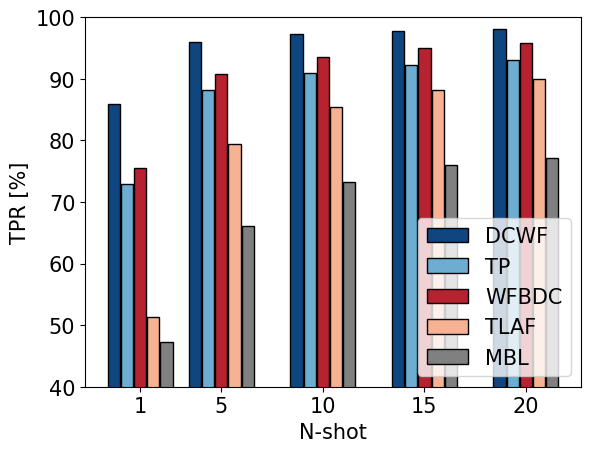

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':15,'font.family':'Times New Roman'})


a = [85.90,95.957,97.339,97.7916,98.122]
b = [72.876,88.17651,90.95097,92.1886,93.052]
c = [75.4608,90.8114,93.52319,94.91368,95.8197]
d = [51.2946,79.3317,85.40401,88.1978,89.9147]
e = [47.18685,66.15001,73.2032,75.92518,77.1681]
# marks = ["o", "X", "+", "*", "O"]

x= np.array([1,5,10,15,20]) # 标签位置
width = 0.6  # 柱状图的宽度

plt.bar(x - width * 2-0.1, a, width, label='DCWF', color=(16/255, 70/255, 128/255),edgecolor="k")
plt.bar(x - width - 0.05, b, width, label='TP', color=(109/255,173/255, 209/255), edgecolor="k")
plt.bar(x + 0, c, width, label="WFBDC", color=(183/255,34/255, 48/255), edgecolor="k")
plt.bar(x + width + 0.05, d, width, label='TLAF', color=(246/255,178/255, 147/255), edgecolor="k")
plt.bar(x + width * 2 + 0.1, e, width, label='MBL', color='gray', edgecolor="k")
plt.xlabel('N-shot')
plt.ylim((40,100))
plt.xticks([1,5,10,15,20])
plt.ylabel('TPR [%]')

# plt.plot(x, a, marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
# plt.plot(x, b, marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
# plt.plot(x, c, marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
# plt.plot(x, d, marker='s', linestyle='-.', label='TLAF',color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)
# plt.plot(x, e, marker='o', linestyle='--', label='MBL',color='gray',linewidth=2.5,markersize=8)

# 添加图例
plt.legend(loc='lower right')

# 添加标题和标签
# # plt.title('Discrete Data Visualization')
# plt.xlabel('N-shot')
# plt.ylim((40,100))
# plt.xticks([1,5,10,15,20])
# plt.ylabel('Accuracy [%]')

# 显示图形
plt.show()




findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

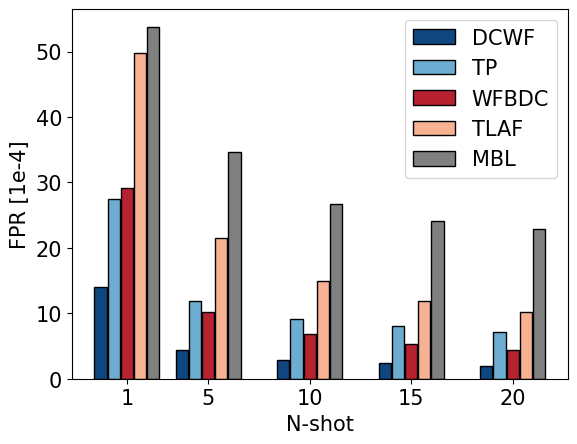

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':15,'font.family':'Times New Roman'})


a = [14,04.4,02.82,02.45,1.96]
b = [27.5,11.915,09.118,08.083,07.17]
c = [29.12,10.185,06.776,05.25,04.326]
d = [49.78,21.55,14.8658,11.92,10.22]
e = [53.8,34.6,26.7,24.0779,22.82]
# marks = ["o", "X", "+", "*", "O"]

x= np.array([1,5,10,15,20]) # 标签位置
width = 0.6  # 柱状图的宽度

plt.bar(x - width * 2-0.1, a, width, label='DCWF', color=(16/255, 70/255, 128/255),edgecolor="k")
plt.bar(x - width - 0.05, b, width, label='TP', color=(109/255,173/255, 209/255), edgecolor="k")
plt.bar(x + 0, c, width, label="WFBDC", color=(183/255,34/255, 48/255), edgecolor="k")
plt.bar(x + width + 0.05, d, width, label='TLAF', color=(246/255,178/255, 147/255), edgecolor="k")
plt.bar(x + width * 2 + 0.1, e, width, label='MBL', color='gray', edgecolor="k")
plt.xlabel('N-shot')
# plt.ylim(())
plt.xticks([1,5,10,15,20])
plt.ylabel('FPR [1e-4]')

# plt.plot(x, a, marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
# plt.plot(x, b, marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
# plt.plot(x, c, marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
# plt.plot(x, d, marker='s', linestyle='-.', label='TLAF',color=(246/255,178/255, 147/255),linewidth=2.5,markersize=8)
# plt.plot(x, e, marker='o', linestyle='--', label='MBL',color='gray',linewidth=2.5,markersize=8)

# 添加图例
plt.legend(loc='upper right')

# 添加标题和标签
# # plt.title('Discrete Data Visualization')
# plt.xlabel('N-shot')
# plt.ylim((40,100))
# plt.xticks([1,5,10,15,20])
# plt.ylabel('Accuracy [%]')

# 显示图形
plt.show()




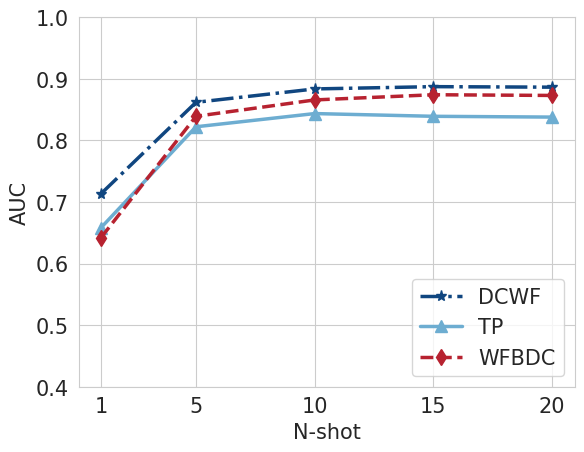

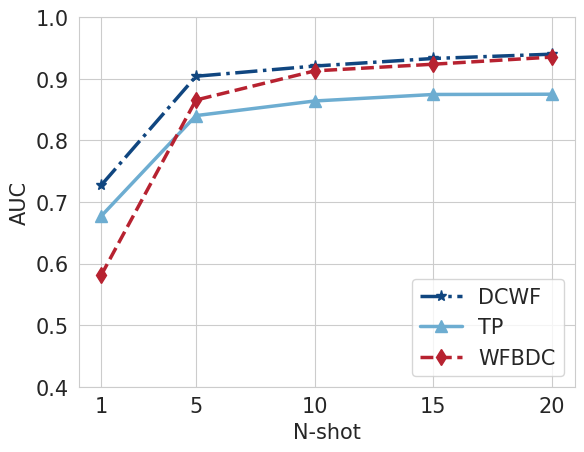

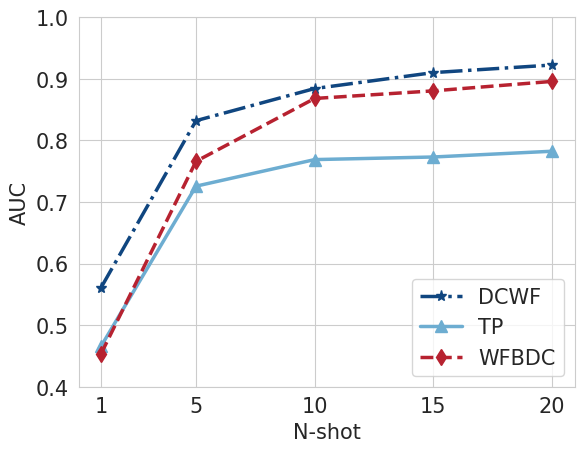

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 创建一个 2x3 的子图布局
sns.set_style("whitegrid", {"grid.linewidth": 15, "grid.alpha": 0.5})
plt.rcParams.update({'font.size':15})
data_1 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.71342857,.86171432,.88342857,.88714286,.8862857],
    'TP': [.65829,.822,.84343,.839,.83771],
    'WFBDC':[.6421428,.8390000,.8655714,.87399999,.872857]
}
data_1 = pd.DataFrame(data_1)
data_1 = data_1.set_index('N-shot')

data_2 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.7268571,.90400,.92057144,.93285713,.93985717],
    'TP': [.67671,.84014,.86386,.87443,.87486],
    'WFBDC':[.580714,.86542857,.91271428,.9235714,.93514285]
}
data_2 = pd.DataFrame(data_2)
data_2 = data_2.set_index('N-shot')

data_3 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.56090225,.83187973,.88406013,.90992485,.92225563],
    'TP': [.46571,.72556,.76872,.77293,.78226],
    'WFBDC':[.4535338,.76586466,.8679699,.88030075,.895639]
}
data_3 = pd.DataFrame(data_3)
data_3 = data_3.set_index('N-shot')
x = [1,5,10,15,20]
# fig, axes = plt.subplots(1,3, figsize=(12,4))
# 在每个子图中绘制数据
# sns.lineplot(data=data_1,ax=axes[0],linewidth=2)
# sns.scatterplot(data = data_1, ax=axes[0],legend=None,s=50)
plt.figure(1)
plt.plot(x, data_1['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x, data_1['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
plt.plot(x, data_1['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((0.4,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')


# sns.lineplot(data=data_2,ax=axes[1],linewidth=2)
# sns.scatterplot(data = data_2, ax=axes[1],legend=None,s=50)
plt.figure(2)
plt.plot(x, data_2['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x, data_2['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
plt.plot(x, data_2['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((0.4,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')

# sns.lineplot(data=data_3,ax=axes[2],linewidth=2)
# sns.scatterplot(data = data_3, ax=axes[2],legend=None,s=50)
plt.figure(3)
plt.plot(x, data_3['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=2.5,markersize=8)
plt.plot(x, data_3['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=2.5,markersize=8)
plt.plot(x, data_3['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=2.5,markersize=8)
plt.legend(loc='lower right')
plt.xlabel('N-shot')
plt.ylabel('AUC')
plt.xticks([1,5,10,15,20])
plt.ylim((0.4,1))


# 调整子图之间的间距
# plt.tight_layout()

# 显示图形
plt.show()

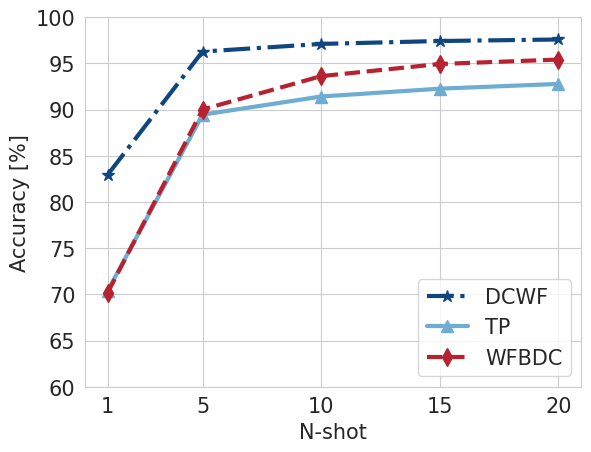

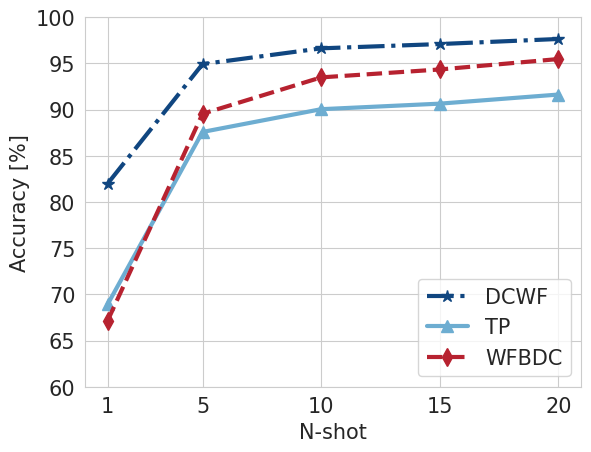

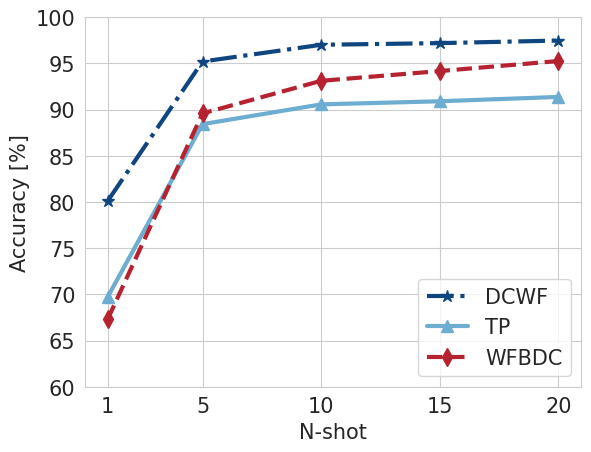

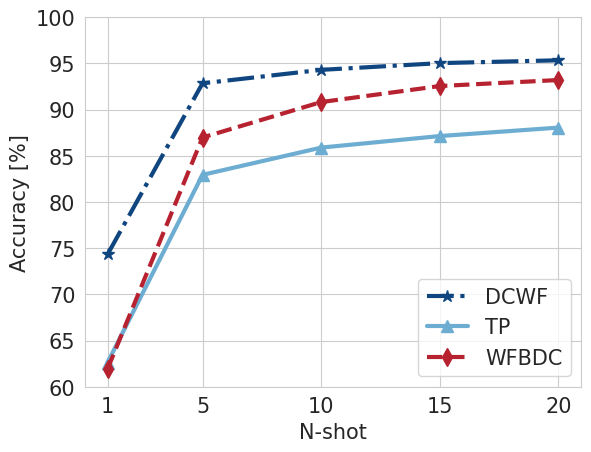

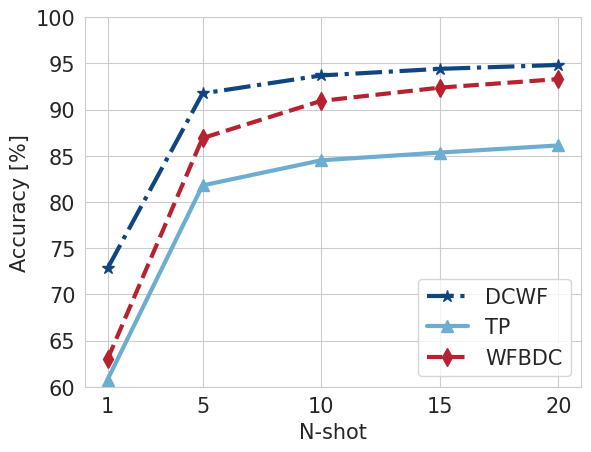

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 创建一个 2x3 的子图布局
sns.set_style("whitegrid", {"grid.linewidth": 5, "grid.alpha": 0.5})
plt.rcParams.update({'font.size':15})
x = [1,5,10,15,20]
data_1 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [82.9285,96.2714,97.100,97.4143,97.5786],
    'TP': [70.357,89.443,91.407,92.257,92.771],
    'WFBDC':[70.1642,90.0000,93.6143,94.9285,95.4071]
}
data_1 = pd.DataFrame(data_1)
data_1 = data_1.set_index('N-shot')

data_2 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [81.9714,94.9143,96.6214,97.0857,97.6357],
    'TP': [68.907,87.571,90.036,90.636,91.621],
    'WFBDC':[67.1285,89.5357,93.4786,94.3357,95.4643]
}
data_2 = pd.DataFrame(data_2)
data_2 = data_2.set_index('N-shot')

data_3 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [80.0857,95.1928,97.0071,97.1857,97.4643],
    'TP': [69.693,88.414,90.557,90.893,91.364],
    'WFBDC':[67.2786,89.5786,93.1071,94.1643,95.2500]
}
data_3 = pd.DataFrame(data_3)
data_3 = data_3.set_index('N-shot')
data_4 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [74.3214,92.8357,94.2929,95.0214,95.3286],
    'TP': [62.621,82.929,85.879,87.129,88.043],
    'WFBDC':[61.9285,86.9714,90.8071,92.5428,93.1928]
}
data_4 = pd.DataFrame(data_4)
data_4 = data_4.set_index('N-shot')
data_5 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [72.8137,91.7411,93.6881,94.4013,94.8233],
    'TP': [60.766,81.783,84.504,85.342,86.114],
    'WFBDC':[62.9863,86.9059,90.9332,92.3689,93.2950]
}
data_5 = pd.DataFrame(data_5)
data_5 = data_5.set_index('N-shot')
# fig, axes = plt.subplots(2, 3, figsize=(14,8))
# 在每个子图中绘制数据
# sns.lineplot(data=data_1,ax=axes[0][0],linewidth=2)
# sns.scatterplot(data = data_1, ax=axes[0][0],legend=None,s=50)
# axes[0][0].set_xticks([1,5,10,15,20])
# axes[0][0].set_ylim((60,100))
# axes[0][0].set_ylabel('Accuracy')

plt.figure(1)
plt.plot(x, data_1['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_1['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_1['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((60,100))
plt.ylabel('Accuracy [%]')
plt.xlabel('N-shot')

# sns.lineplot(data=data_2,ax=axes[0][1],linewidth=2)
# sns.scatterplot(data = data_2, ax=axes[0][1],legend=None,s=50)
# axes[0][1].set_xticks([1,5,10,15,20])
# axes[0][1].set_ylim((60,100))

plt.figure(2)
plt.plot(x, data_2['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_2['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_2['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((60,100))
plt.ylabel('Accuracy [%]')
plt.xlabel('N-shot')

# sns.lineplot(data=data_3,ax=axes[0][2],linewidth=2)
# sns.scatterplot(data = data_3, ax=axes[0][2],legend=None,s=50)
# axes[0][2].set_xticks([1,5,10,15,20])
# axes[0][2].set_ylim((60,100))

plt.figure(3)
plt.plot(x, data_3['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_3['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_3['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((60,100))
plt.ylabel('Accuracy [%]')
plt.xlabel('N-shot')

# sns.lineplot(data=data_4,ax=axes[1][0],linewidth=2)
# sns.scatterplot(data = data_4, ax=axes[1][0],legend=None,s=50)
# axes[1][0].set_xticks([1,5,10,15,20])
# axes[1][0].set_ylim((60,100))
# axes[1][0].set_ylabel('Accuracy')

plt.figure(4)
plt.plot(x, data_4['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_4['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_4['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((60,100))
plt.ylabel('Accuracy [%]')
plt.xlabel('N-shot')

# sns.lineplot(data=data_5,ax=axes[1][1],linewidth=2)
# sns.scatterplot(data = data_5, ax=axes[1][1],legend=None,s=50)
# axes[1][1].set_xticks([1,5,10,15,20])
# axes[1][1].set_ylim((60,100))
# # 隐藏多余的子图
# axes[1, 2].axis('off')

plt.figure(5)
plt.plot(x, data_5['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_5['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_5['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([1,5,10,15,20])
plt.ylim((60,100))
plt.ylabel('Accuracy [%]')
plt.xlabel('N-shot')
# 调整子图之间的间距
# plt.tight_layout()

# 显示图形
plt.show()

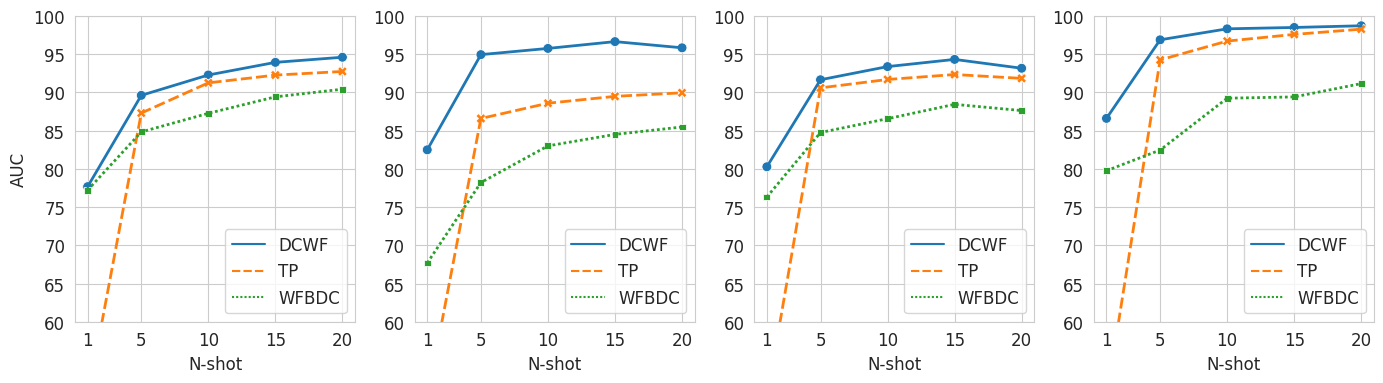

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 创建一个 2x3 的子图布局
sns.set_style("whitegrid", {"grid.linewidth": 5, "grid.alpha": 0.5})
plt.rcParams.update({'font.size':12})
data_1 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [77.672,89.617,92.282,93.9339,94.604],
    'TP': [50,87.299,91.2518,92.267,92.7429],
    'WFBDC':[77.2236,84.8328,87.2659,89.4219,90.4216]
}
data_1 = pd.DataFrame(data_1)
data_1 = data_1.set_index('N-shot')

data_2 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [82.4915,94.948,95.7585,96.6489,95.840],
    'TP': [50,86.5907,88.589,89.488,89.951],
    'WFBDC':[67.6820,78.2085,83.00798,84.50796,85.4801]
}
data_2 = pd.DataFrame(data_2)
data_2 = data_2.set_index('N-shot')

data_3 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [80.274,91.659,93.380,94.321,93.1638],
    'TP': [50,90.5975,91.695,92.343,91.84],
    'WFBDC':[76.3156,84.756,86.565,88.4406,87.625]
}
data_3 = pd.DataFrame(data_3)
data_3 = data_3.set_index('N-shot')
data_4 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [86.604,96.8848,98.321,98.500,98.722],
    'TP': [50,94.2568,96.717,97.5921,98.2786],
    'WFBDC':[79.7596,82.459,89.244,89.4135,91.1567]
}
data_4 = pd.DataFrame(data_4)
data_4 = data_4.set_index('N-shot')
fig, axes = plt.subplots(1,4, figsize=(14,4))
# 在每个子图中绘制数据
sns.lineplot(data=data_1,ax=axes[0],linewidth=2)
sns.scatterplot(data = data_1, ax=axes[0],legend=None,s=50)
axes[0].set_xticks([1,5,10,15,20])
axes[0].set_ylim((60,100))
axes[0].set_ylabel('AUC')

sns.lineplot(data=data_2,ax=axes[1],linewidth=2)
sns.scatterplot(data = data_2, ax=axes[1],legend=None,s=50)
axes[1].set_xticks([1,5,10,15,20])
axes[1].set_ylim((60,100))

sns.lineplot(data=data_3,ax=axes[2],linewidth=2)
sns.scatterplot(data = data_3, ax=axes[2],legend=None,s=50)
axes[2].set_xticks([1,5,10,15,20])
axes[2].set_ylim((60,100))

sns.lineplot(data=data_4,ax=axes[3],linewidth=2)
sns.scatterplot(data = data_4, ax=axes[3],legend=None,s=50)
axes[3].set_xticks([1,5,10,15,20])
axes[3].set_ylim((500,100))

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

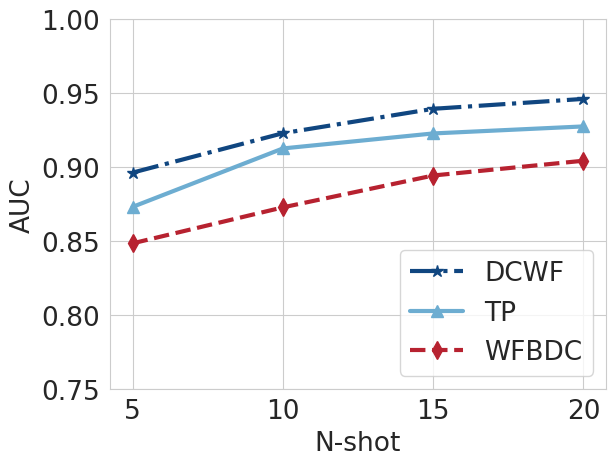

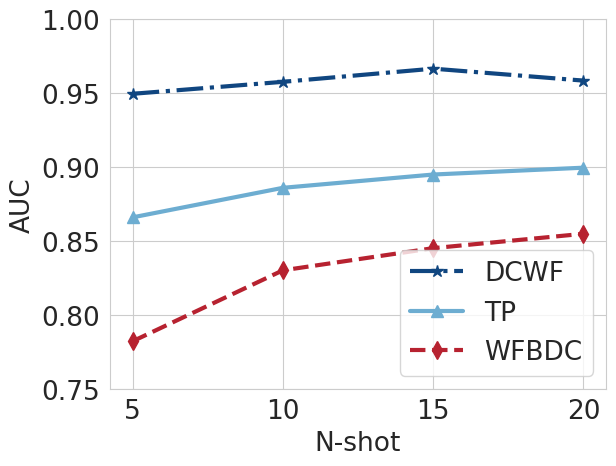

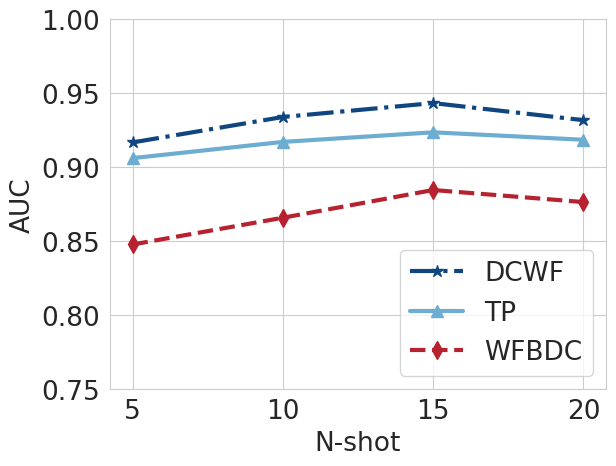

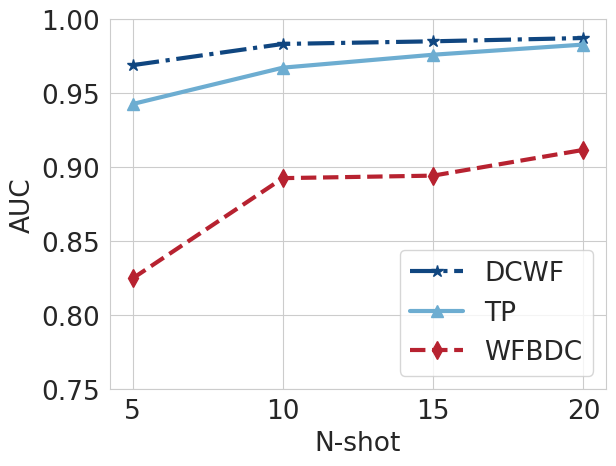

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 创建一个 2x3 的子图布局

sns.set_style("whitegrid", {"grid.linewidth": 5, "grid.alpha": 0.5})
plt.rcParams.update({'font.size':19})
data_1 = {
    'N-shot': [5,10,15,20],
    'DCWF': [.89617,.92282,.939339,.94604],
    'TP': [.87299,.912518,.92267,.927429],
    'WFBDC':[.848328,.872659,.894219,.904216]
}
data_1 = pd.DataFrame(data_1)
data_1 = data_1.set_index('N-shot')

data_2 = {
    'N-shot': [5,10,15,20],
    'DCWF': [.94948,.957585,.966489,.95840],
    'TP': [.865907,.88589,.89488,.89951],
    'WFBDC':[.782085,.8300798,.8450796,.854801]
}
data_2 = pd.DataFrame(data_2)
data_2 = data_2.set_index('N-shot')

data_3 = {
    'N-shot': [5,10,15,20],
    'DCWF': [.91659,.93380,.94321,.931638],
    'TP': [.905975,.91695,.92343,.9184],
    'WFBDC':[.84756,.86565,.884406,.87625]
}
data_3 = pd.DataFrame(data_3)
data_3 = data_3.set_index('N-shot')
data_4 = {
    'N-shot': [5,10,15,20],
    'DCWF': [.968848,.98321,.98500,.98722],
    'TP': [.942568,.96717,.975921,.982786],
    'WFBDC':[.82459,.89244,.894135,.911567]
}
x = [5,10,15,20]
data_4 = pd.DataFrame(data_4)
data_4 = data_4.set_index('N-shot')
# fig, axes = plt.subplots(1,4, figsize=(16,4))
# 在每个子图中绘制数据
# sns.lineplot(data=data_1,ax=axes[0],linewidth=2)
# sns.scatterplot(data = data_1, ax=axes[0],legend=None,s=50)
# axes[0].set_xticks([5,10,15,20])
# # axes[0].set_xticklabels(['9k','50k','100k','200k','400k'])
# # axes[0].set_xlabel('Size')
# axes[0].set_ylim((75,100))
# axes[0].set_ylabel('AUC')

plt.figure(1)
plt.plot(x, data_1['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_1['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_1['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([5,10,15,20])
plt.ylim((.75,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')

# sns.lineplot(data=data_2,ax=axes[1],linewidth=2)
# sns.scatterplot(data = data_2, ax=axes[1],legend=None,s=50)
# axes[1].set_xticks([5,10,15,20])
# # axes[1].set_xticklabels(['9k','50k','100k','200k','400k'])
# # axes[1].set_xlabel('Size')
# axes[1].set_ylim((75,100))

plt.figure(2)
plt.plot(x, data_2['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_2['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_2['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([5,10,15,20])
plt.ylim((.75,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')

# sns.lineplot(data=data_3,ax=axes[2],linewidth=2)
# sns.scatterplot(data = data_3, ax=axes[2],legend=None,s=50)
# axes[2].set_xticks([5,10,15,20])
# # axes[2].set_xticklabels(['9k','50k','100k','200k','400k'])
# # axes[2].set_xlabel('Size')
# axes[2].set_ylim((75,100))
plt.figure(3)
plt.plot(x, data_3['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_3['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_3['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([5,10,15,20])
plt.ylim((.75,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')

# sns.lineplot(data=data_4,ax=axes[3],linewidth=2)
# sns.scatterplot(data = data_4, ax=axes[3],legend=None,s=50)
# axes[3].set_xticks([5,10,15,20])
# # axes[3].set_xticklabels(['9k','50k','100k','200k','400k'])
# # axes[3].set_xlabel('Size')
# axes[3].set_ylim((75,100))

plt.figure(4)
plt.plot(x, data_4['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_4['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_4['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks([5,10,15,20])
plt.ylim((.75,1))
plt.ylabel('AUC')
plt.xlabel('N-shot')

# # 调整子图之间的间距
# plt.tight_layout()

# 显示图形
plt.show()

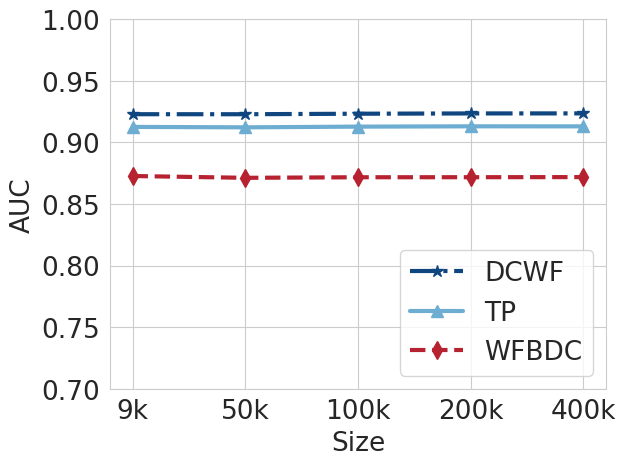

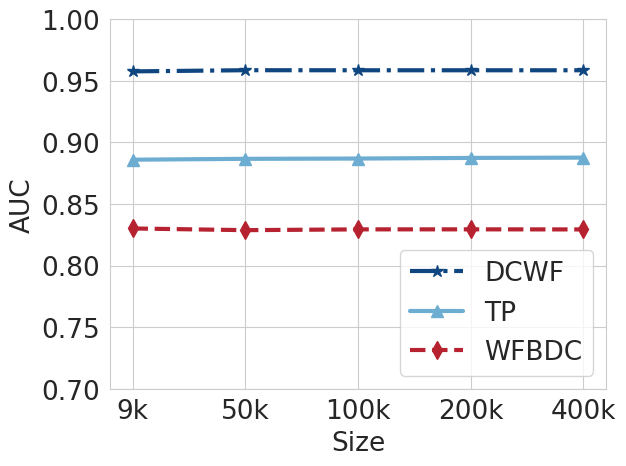

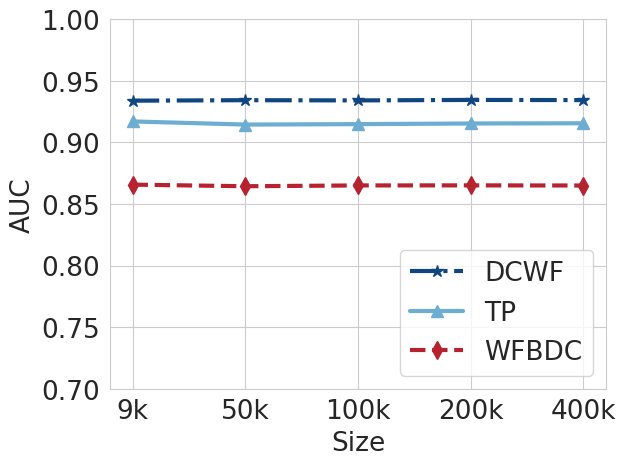

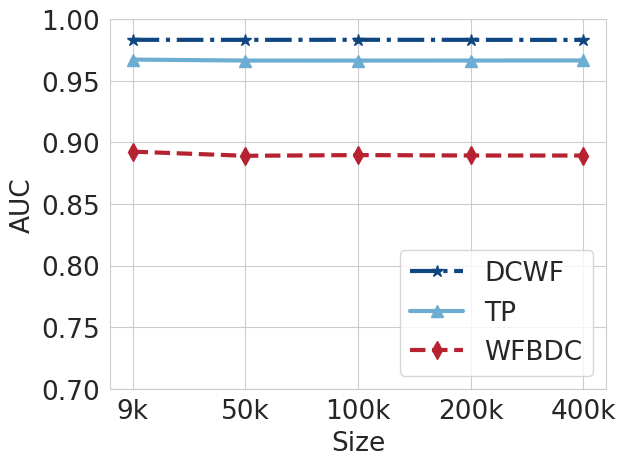

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 创建一个 2x3 的子图布局
sns.set_style("whitegrid", {"grid.linewidth": 5, "grid.alpha": 0.5})
plt.rcParams.update({'font.size':19})
data_1 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.92282,.9228036,.9232146,.92345,.9234841],
    'TP': [.912518,.912160,.912737,.91299,.912957],
    'WFBDC':[.872659,.87119,.871646,.8716799,.87177]
}
data_1 = pd.DataFrame(data_1)
data_1 = data_1.set_index('N-shot')

data_2 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.957585,.95853,.958482,.958483,.958485],
    'TP': [.88589,.8866,.886831,.88734,.887574],
    'WFBDC':[.8300798,.828702,.82935,.8293642,.8293004]
}
data_2 = pd.DataFrame(data_2)
data_2 = data_2.set_index('N-shot')

data_3 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.93380,.934197,.9340182,.9344154,.9342798],
    'TP': [.91695,.914417,.91476,.91529,.9154586],
    'WFBDC':[.86565,.864355,.8650049,.86506,.86494]
}
data_3 = pd.DataFrame(data_3)
data_3 = data_3.set_index('N-shot')
data_4 = {
    'N-shot': [1,5,10,15,20],
    'DCWF': [.98321,.983174,.98323,.9831824,.983129],
    'TP': [.96717,.966372,.966357,.9664,.96644],
    'WFBDC':[.89244,.88907,.8896435,.8893067,.8892699]
}
data_4 = pd.DataFrame(data_4)
data_4 = data_4.set_index('N-shot')
x = ['9k','50k','100k','200k','400k']
# fig, axes = plt.subplots(1,4, figsize=(16,4))
# 在每个子图中绘制数据
# sns.lineplot(data=data_1,ax=axes[0],linewidth=2)
# sns.scatterplot(data = data_1, ax=axes[0],legend=None,s=50)
# axes[0].set_xticks([1,5,10,15,20])
# axes[0].set_xticklabels(['9k','50k','100k','200k','400k'])
# axes[0].set_xlabel('Size')
# axes[0].set_ylim((80,100))
# axes[0].set_ylabel('AUC')

plt.figure(1)
plt.plot(x, data_1['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_1['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_1['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks(['9k','50k','100k','200k','400k'])
plt.ylim((.70,1))
plt.ylabel('AUC')
plt.xlabel('Size')

# sns.lineplot(data=data_2,ax=axes[1],linewidth=2)
# sns.scatterplot(data = data_2, ax=axes[1],legend=None,s=50)
# axes[1].set_xticks([1,5,10,15,20])
# axes[1].set_xticklabels(['9k','50k','100k','200k','400k'])
# axes[1].set_xlabel('Size')
# axes[1].set_ylim((80,100))

plt.figure(2)
plt.plot(x, data_2['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_2['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_2['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks(['9k','50k','100k','200k','400k'])
plt.ylim((.70,1))
plt.ylabel('AUC')
plt.xlabel('Size')

# sns.lineplot(data=data_3,ax=axes[2],linewidth=2)
# sns.scatterplot(data = data_3, ax=axes[2],legend=None,s=50)
# axes[2].set_xticks([1,5,10,15,20])
# axes[2].set_xticklabels(['9k','50k','100k','200k','400k'])
# axes[2].set_xlabel('Size')
# axes[2].set_ylim((80,100))

plt.figure(3)
plt.plot(x, data_3['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_3['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_3['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks(['9k','50k','100k','200k','400k'])
plt.ylim((.70,1))
plt.ylabel('AUC')
plt.xlabel('Size')

# sns.lineplot(data=data_4,ax=axes[3],linewidth=2)
# sns.scatterplot(data = data_4, ax=axes[3],legend=None,s=50)
# axes[3].set_xticks([1,5,10,15,20])
# axes[3].set_xticklabels(['9k','50k','100k','200k','400k'])
# axes[3].set_xlabel('Size')
# axes[3].set_ylim((80,100))
plt.figure(4)
plt.plot(x, data_4['DCWF'], marker='*', linestyle='-.', label='DCWF',color=(16/255, 70/255, 128/255),linewidth=3,markersize=9)
plt.plot(x, data_4['TP'], marker='^', linestyle='-', label='TP',color=(109/255,173/255, 209/255),linewidth=3,markersize=9)
plt.plot(x, data_4['WFBDC'], marker='d', linestyle='--', label='WFBDC',color=(183/255,34/255, 48/255),linewidth=3,markersize=9)
plt.legend(loc='lower right')
plt.xticks(['9k','50k','100k','200k','400k'])
plt.ylim((.70,1))
plt.ylabel('AUC')
plt.xlabel('Size')

# 调整子图之间的间距
# plt.tight_layout()

# 显示图形
plt.show()